<a href="https://colab.research.google.com/github/gfeyzakorkmaz/gfeyzakorkmaz/blob/main/pythonday44.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

In [3]:
import pandas as pd
df = pd.read_excel(path)

In [6]:
import nltk
from nltk.tokenize import PunktTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter

comments = df['Comments'].fillna("").values

nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

tokenized_comments = [word_tokenize(comment.lower()) for comment in comments]
filtered_comments = [[word for word in comment if word.isalnum() and word not in stop_words]
                     for comment in tokenized_comments]


all_words = [word for comment in filtered_comments for word in comment]
word_counts = Counter(all_words)
print("Word Frequency:", word_counts)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Word Frequency: Counter({'satisfied': 3, 'customer': 3, 'service': 2, 'needs': 2, 'high': 2, 'product': 2, 'enjoys': 2, 'improvement': 1, 'delivery': 1, 'regular': 1, 'occasional': 1, 'buyer': 1, 'spender': 1, 'average': 1, 'experience': 1, 'prefers': 1, 'online': 1, 'shopping': 1, 'new': 1, 'loyal': 1, 'brand': 1, 'conversion': 1, 'rate': 1, 'low': 1, 'engagement': 1, 'quality': 1, 'frequent': 1, 'shopper': 1, 'unhappy': 1, 'returns': 1, 'discounts': 1, 'information': 1, 'interested': 1, 'likes': 1, 'design': 1})


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# prompt: topic modelling for customer feedback

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'
df = pd.read_excel(path)

comments = df['Comments'].fillna("").values

nltk.download("punkt")
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# Preprocess the comments
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

processed_comments = [preprocess_text(comment) for comment in comments]


# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(processed_comments)


# LDA Topic Modeling
num_topics = 5  # Adjust the number of topics as needed
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)


# Display top words for each topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda_model.components_):
    top_words_idx = topic.argsort()[:-10 - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

Topic 1: product satisfied enjoys service high customer needs
Topic 2: customer service satisfied high product enjoys needs
Topic 3: enjoys product satisfied service high customer needs
Topic 4: needs satisfied service high customer product enjoys
Topic 5: high service satisfied customer product enjoys needs


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


With AI

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = TfidfVectorizer(max_features=100, stop_words='english')
X = vectorizer.fit_transform(df['Comments'].fillna(""))

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)


for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


Topic 0:
['brand', 'regular', 'needs', 'satisfied', 'enjoys', 'customer', 'high', 'spender', 'new', 'interested']
Topic 1:
['customer', 'satisfied', 'high', 'enjoys', 'needs', 'average', 'experience', 'returns', 'unhappy', 'information']
Topic 2:
['conversion', 'rate', 'loyal', 'brand', 'shopper', 'frequent', 'regular', 'customer', 'satisfied', 'service']
Topic 3:
['high', 'satisfied', 'shopping', 'prefers', 'online', 'quality', 'occasional', 'buyer', 'enjoys', 'product']
Topic 4:
['high', 'needs', 'delivery', 'improvement', 'enjoys', 'engagement', 'low', 'likes', 'design', 'discounts']


similar //

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

spam_labels = [0 if "sale" in comment.lower() else 1 for comment in df['Comments'].fillna("")]

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comments'].fillna(""))

model = MultinomialNB()
model.fit(X, spam_labels)
print("Spam detection model trained.")

Spam detection model trained.


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10, stop_words='english')
X = vectorizer.fit_transform(df['Comments'].fillna(""))


keywords = vectorizer.get_feature_names_out()
print("Top Keywords:", keywords)

Top Keywords: ['customer' 'enjoys' 'high' 'needs' 'occasional' 'online' 'prefers'
 'product' 'satisfied' 'service']


In [13]:
from textblob import TextBlob

df['Sentiment Polarity'] = df['Comments'].fillna("").apply(lambda x: TextBlob(x).sentiment.polarity)
print("Sentiment Polarity calculated.")

Sentiment Polarity calculated.


In [14]:
satisfied = df[df['Sentiment Polarity'] > 0]
unsatisfied = df[df['Sentiment Polarity'] <= 0]

print(f"Number of satisfied customers: {len(satisfied)}")
print(f"Number of unsatisfied customers: {len(unsatisfied)}")

Number of satisfied customers: 9
Number of unsatisfied customers: 11


In [18]:
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

tokenized_comments = [word_tokenize(comment.lower()) for comment in df['Comments'].fillna("")]
all_tokens = [token for comment in tokenized_comments for token in comment if token.isalnum]
bigram_finder = BigramCollocationFinder.from_words(all_tokens)

top_bigrams = bigram_finder.nbest(BigramAssocMeasures.likelihood_ratio, 10)
print("Top Bigrams:", top_bigrams)

Top Bigrams: [('satisfied', 'with'), ('average', 'experience'), ('conversion', 'rate'), ('delivery', 'regular'), ('experience', 'prefers'), ('frequent', 'shopper'), ('improvement', 'in'), ('in', 'delivery'), ('interested', 'likes'), ('low', 'engagement')]


In [19]:
negative_feedback = df[df['Sentiment Polarity'] < 0]
print("Negative Feedback:")
print(negative_feedback[['Comments', 'Sentiment Polarity']])

Negative Feedback:
                Comments  Sentiment Polarity
5     Average experience              -0.150
13  Unhappy with returns              -0.600
18        Not interested              -0.125


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Comments'].fillna(""))
y = pd.Categorical(df['Purchased Category']).codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)
print("Feedback classification model trained.")

Feedback classification model trained.


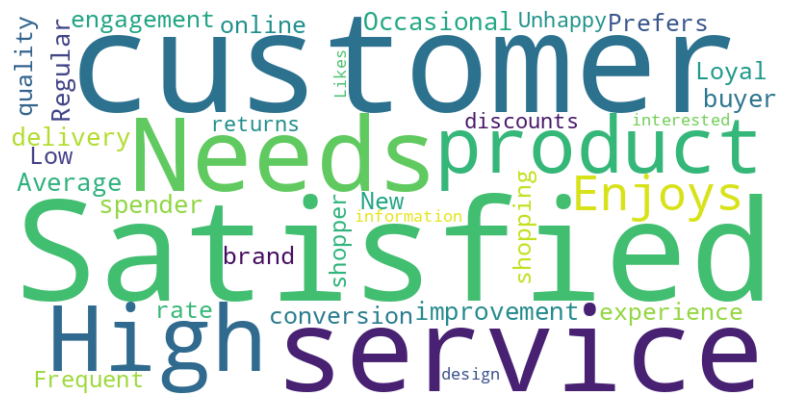

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['Comments'].fillna("")))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()